In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load your dataset
df = pd.read_csv("C:\\Users\\giriu\\Downloads\\21_customer_lifetime_value.csv")  # Replace with actual filename

# Preview the data
print(df.head())
print(df.info())
print(df.describe())

  customer_id  purchase_history  tenure  total_spent       CLV
0       C1000                39      37      1111.72   3427.80
1       C1001                29      36      8556.68  25670.04
2       C1002                15      24      5317.54  10635.08
3       C1003                43      31      8276.62  21381.27
4       C1004                 8       6      3053.91   1526.96
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1000 non-null   object 
 1   purchase_history  1000 non-null   int64  
 2   tenure            1000 non-null   int64  
 3   total_spent       1000 non-null   float64
 4   CLV               1000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB
None
       purchase_history       tenure  total_spent           CLV
count       1000.000000  1000.000000   1000.00000   1000

In [3]:
#3(i) Drop duplicates
df.drop_duplicates(inplace=True)

#3(ii) Check for missing values
print(df.isnull().sum())

# 3(ii) Drop or fill missing values
df.dropna(inplace=True)  

customer_id         0
purchase_history    0
tenure              0
total_spent         0
CLV                 0
dtype: int64


In [7]:
#based on retrive dataset, Select features and target
X = df[['purchase_history', 'tenure', 'total_spent']]
y = df['CLV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Model Importing (Randomforest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
#Model Evaluation
# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 354.46
RMSE: 590.36


In [14]:
# Predict CLV for all customers
df['Predicted_CLV'] = model.predict(X)

# Segment customers based on predicted CLV
df['Segment'] = pd.qcut(df['Predicted_CLV'], q=3, labels=['Low', 'Medium', 'High'])

# Save final output
df[['customer_id', 'Predicted_CLV', 'Segment']].to_csv('final_clv_segments.csv', index=False)
df

,customer_id,purchase_history,tenure,total_spent,CLV,Predicted_CLV,Segment
0,C1000,39,37,1111.72,3427.80,3506.7051,Low
1,C1001,29,36,8556.68,25670.04,25788.0344,High
2,C1002,15,24,5317.54,10635.08,10704.6960,Medium
3,C1003,43,31,8276.62,21381.27,21319.8773,High
4,C1004,8,6,3053.91,1526.96,1584.7433,Low
...,...,...,...,...,...,...,...
995,C1995,24,46,9665.81,37052.27,36196.4243,High
996,C1996,9,34,1361.79,3858.40,3962.4437,Low
997,C1997,3,29,7106.11,17173.10,17437.3730,High
998,C1998,31,4,9730.49,3243.50,3303.0618,Low


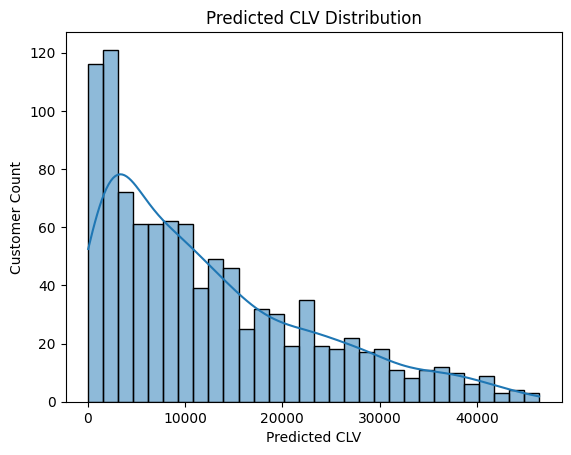

In [15]:
#CLV Distribution (Visualized version)
sns.histplot(df['Predicted_CLV'], bins=30, kde=True)
plt.title('Predicted CLV Distribution')
plt.xlabel('Predicted CLV')
plt.ylabel('Customer Count')
plt.show()
